In [1]:
# !pip install numpy

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

In [3]:
df=sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X=df.drop('species',axis=1)
y=df['species']

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
numerical_col=X.select_dtypes(include='float64')
categorical_col=X.select_dtypes(include='object')

In [9]:
num_pipeline=Pipeline(steps=
                    [
                        ('imputer',SimpleImputer(strategy='mean')),
                        ('scaler',StandardScaler()),
                    ])
cat_pipeline=Pipeline(steps=
                    [
                        ('imputer',SimpleImputer(strategy='most_frequient')),
                        ('encoding',LabelEncoder()),
                        ('scaler',StandardScaler()),
                    ])

In [10]:
preprocessor=ColumnTransformer([
    ('numerical_pipeline',num_pipeline,numerical_col.columns.tolist()),
    ('categorical_pipeline',cat_pipeline,categorical_col.columns.tolist()),
])

In [11]:
preprocessor

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['sepal_length', 'sepal_width', 'petal_length',
                                  'petal_width']),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequient')),
                                                 ('encoding', LabelEncoder()),
                                                 ('scaler', StandardScaler())]),
                                 [])])

In [12]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

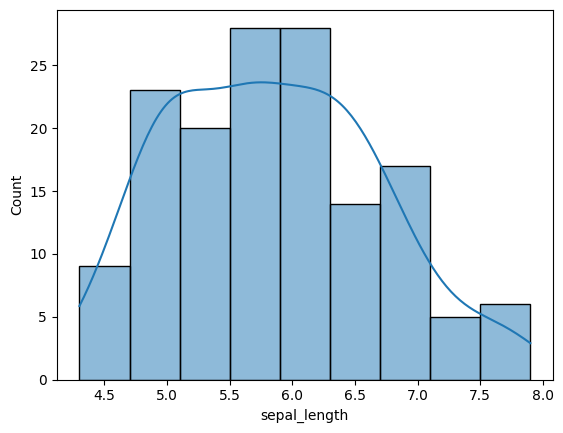

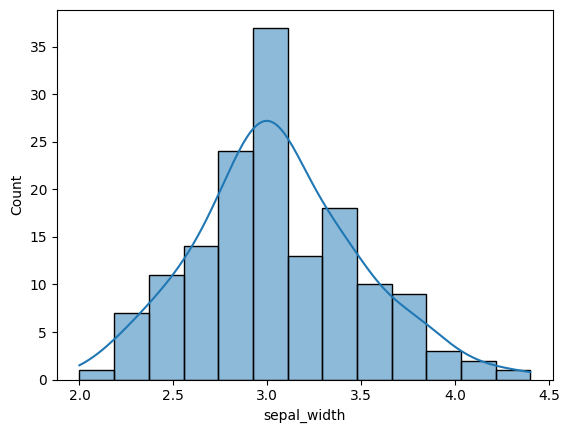

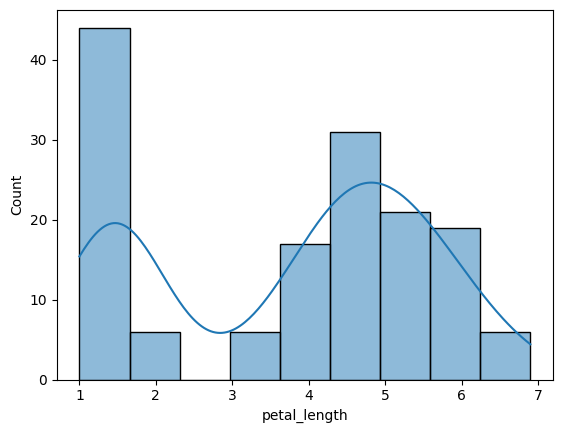

<Axes: xlabel='petal_width', ylabel='Count'>

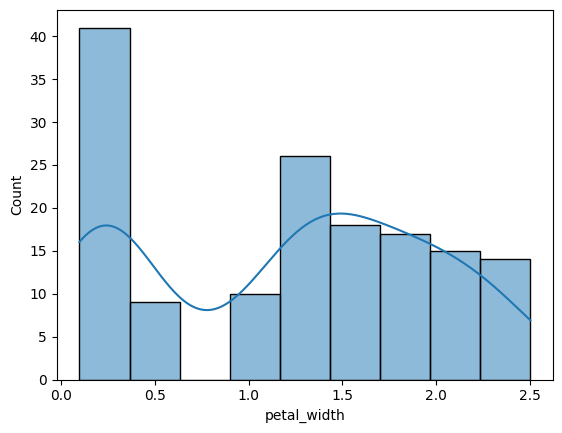

In [13]:
sns.histplot(df['sepal_length'],kde=True)
plt.show()
sns.histplot(df['sepal_width'],kde=True)
plt.show()
sns.histplot(df['petal_length'],kde=True)
plt.show()
sns.histplot(df['petal_width'],kde=True)

<Axes: >

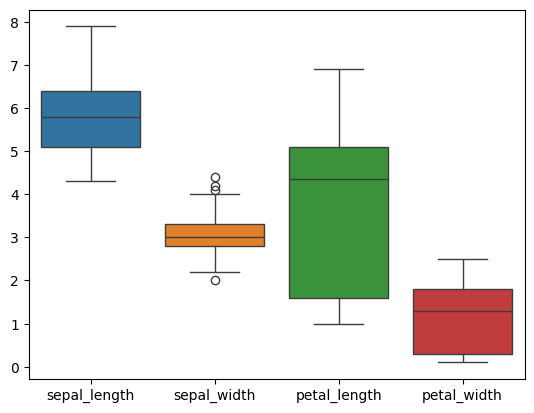

In [14]:
sns.boxplot(df.loc[::1])

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [17]:
model=DecisionTreeClassifier()

In [18]:
params={
    'max_depth':[i for i in range(15)],
    'criterion':["gini", "entropy", "log_loss"],
    "splitter":["best", "random"],
}

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
x_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
x_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [21]:
x_train

,numerical_pipeline__sepal_length,numerical_pipeline__sepal_width,numerical_pipeline__petal_length,numerical_pipeline__petal_width
0,-1.473937,1.203658,-1.562535,-1.312603
1,-0.133071,2.992376,-1.276006,-1.045633
2,1.085898,0.085709,0.385858,0.289218
3,-1.230143,0.756479,-1.218701,-1.312603
4,-1.717731,0.309299,-1.390618,-1.312603
...,...,...,...,...
115,0.354517,-0.585060,0.156636,0.155733
116,-1.108246,-1.255829,0.443164,0.689673
117,-0.011174,2.098017,-1.447923,-1.312603
118,-0.011174,-1.032239,0.156636,0.022248


In [22]:
clf=GridSearchCV(model,cv=10,verbose=True,param_grid=params)

In [23]:
import warnings
warnings.filterwarnings("ignore",)

In [24]:
clf.fit(x_train,Y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'splitter': ['best', 'random']},
             verbose=True)

In [25]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')

In [26]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}

In [27]:
model=DecisionTreeClassifier(criterion='gini',max_depth= 3, splitter='random')

In [28]:
model.fit(x_train,Y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [29]:
y_pred=model.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
print(accuracy_score(Y_test,y_pred))

0.9666666666666667


In [32]:
from sklearn.tree import plot_tree

[Text(0.4090909090909091, 0.875, 'x[2] <= 0.123\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.18181818181818182, 0.625, 'x[3] <= -0.752\ngini = 0.278\nsamples = 48\nvalue = [40, 8, 0]'),
 Text(0.09090909090909091, 0.375, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2727272727272727, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(0.6363636363636364, 0.625, 'x[3] <= 0.512\ngini = 0.497\nsamples = 72\nvalue = [0, 33, 39]'),
 Text(0.45454545454545453, 0.375, 'x[2] <= 1.069\ngini = 0.17\nsamples = 32\nvalue = [0, 29, 3]'),
 Text(0.36363636363636365, 0.125, 'gini = 0.121\nsamples = 31\nvalue = [0, 29, 2]'),
 Text(0.5454545454545454, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8181818181818182, 0.375, 'x[3] <= 1.14\ngini = 0.18\nsamples = 40\nvalue = [0, 4, 36]'),
 Text(0.7272727272727273, 0.125, 'gini = 0.278\nsamples = 24\nvalue = [0, 4, 20]'),
 Text(0.9090909090909091, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16]')]

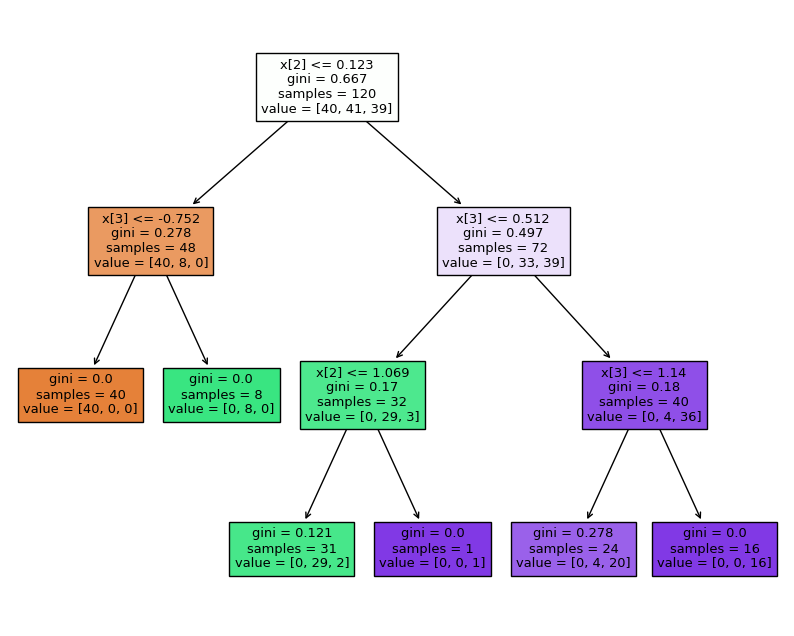

In [33]:
plt.figure(figsize=(10,8))
plot_tree(model,filled=True)

In [34]:
from sklearn.svm import SVC

In [35]:
params={
    'C':[i for i in range(10)],
    'kernel':['linear','poly','rbf','singmoid'],
    'degree':[1,2,3,4,5],
    'gamma':[1,2,3,4]
}

In [36]:
model=SVC()

In [37]:
cv=GridSearchCV(model,param_grid=params,cv=5)

In [38]:
cv.fit(x_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'degree': [1, 2, 3, 4, 5], 'gamma': [1, 2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'singmoid']})

In [39]:
cv.best_params_

{'C': 1, 'degree': 1, 'gamma': 2, 'kernel': 'poly'}

In [40]:
model=SVC(C=1,degree=1,gamma=2,kernel='poly')

In [41]:
model.fit(x_train,Y_train)

SVC(C=1, degree=1, gamma=2, kernel='poly')

In [42]:
y_pred=model.predict(x_test)

In [43]:
accuracy_score(Y_test,y_pred)

0.9666666666666667

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
model=GaussianNB()

In [46]:
model.fit(x_train,Y_train)

GaussianNB()

In [47]:
y_pred=model.predict(x_test)

In [48]:
accuracy_score(Y_test,y_pred)

1.0

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model=RandomForestClassifier()

In [51]:
params={
    'n_estimators':[10,20,30,40,50],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[i for i in range(10)],
    'max_features':['sqrt','log2','None'],
    'bootstrap':[True],
    
    'oob_score':[True]
    
}

In [52]:
cv=GridSearchCV(model,param_grid=params,cv=5)

In [53]:
Y_train

22         setosa
15         setosa
65     versicolor
11         setosa
42         setosa
          ...    
71     versicolor
106     virginica
14         setosa
92     versicolor
102     virginica
Name: species, Length: 120, dtype: object

In [54]:
cv.fit(x_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [10, 20, 30, 40, 50],
                         'oob_score': [True]})

In [55]:
cv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 50,
 'oob_score': True}

In [56]:
model=RandomForestClassifier(bootstrap=True,criterion='gini',max_depth=3,max_features='log2',n_estimators=10,oob_score=True)

In [57]:
model.fit(x_train,Y_train)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=10,
                       oob_score=True)

In [58]:
y_pred=model.predict(x_test)

In [59]:
accuracy_score(Y_test,y_pred)

1.0

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [61]:
models={
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'XGBClassifier':XGBClassifier()
}

In [62]:
for value in models.values():
    print(value)

AdaBoostClassifier()
GradientBoostingClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [63]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten,Dense

In [131]:
model = Sequential([
    Dense(64, activation='relu', input_dim=x_train.shape[1]),
    Dense(32, activation='relu'), 
    Dense(16, activation='relu'), 
    Dense(1, activation='softmax') 
])

In [105]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
from tensorflow.keras.optimizers import Adam

In [146]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae']) 

In [107]:
encoder=LabelEncoder()

In [94]:
x_train.shape

(120, 4)

In [95]:
y_train.shape

(120,)

In [96]:
x_test.shape

(30, 4)

In [97]:
y_test.shape

(120,)

In [98]:
y_train=encoder.fit_transform(Y_train)
y_test=encoder.fit_transform(Y_test)

In [113]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),batch_size=42)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.6387 - mae: 0.6387 - val_loss: 0.7000 - val_mae: 0.7000
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6655 - mae: 0.6655 - val_loss: 0.7000 - val_mae: 0.7000
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6685 - mae: 0.6685 - val_loss: 0.7000 - val_mae: 0.7000
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6595 - mae: 0.6595 - val_loss: 0.7000 - val_mae: 0.7000
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6714 - mae: 0.6714 - val_loss: 0.7000 - val_mae: 0.7000
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6506 - mae: 0.6506 - val_loss: 0.7000 - val_mae: 0.7000
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6833 - mae: 0.6833 - val_loss: 0.7000 - val_mae: 0.7000
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6655 - mae: 0.6655 - val_loss: 0.7000 - val_mae: 0.7000
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6923 - mae: 

<Axes: >

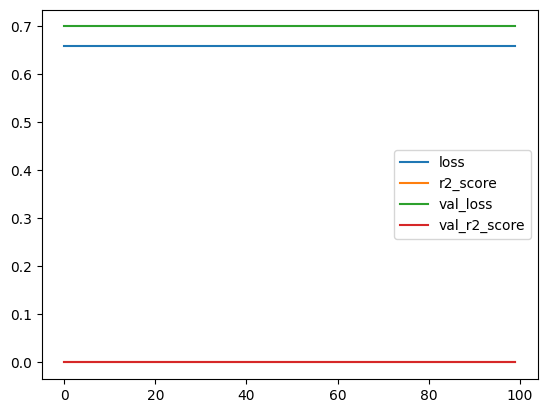

In [111]:
pd.DataFrame(history.history).plot()

In [116]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,837 (34.52 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,892 (23.02 KB)

In [134]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard

In [138]:
erl_stoping=EarlyStopping(patience=5,monitor='val_loss',verbose=True,restore_best_weights=False,start_from_epoch=0)

In [139]:
tensorboard=TensorBoard(log_dir='logs')

In [148]:
check_point=ModelCheckpoint(filepath='abhi.weights.h5',monitor='val_loss',verbose=True,save_best_only=False,save_weights_only=True)

In [149]:
model.fit(x_train,y_train,epochs=100,callbacks=[erl_stoping,tensorboard,check_point],validation_data=(x_test,y_test))

Epoch 1/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.6875 - mae: 0.6875
Epoch 1: saving model to abhi.weights.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.6758 - mae: 0.6758 - val_loss: 0.7000 - val_mae: 0.7000
Epoch 2/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.6562 - mae: 0.6562
Epoch 2: saving model to abhi.weights.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.6685 - mae: 0.6685 - val_loss: 0.7000 - val_mae: 0.7000
Epoch 3/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.5938 - mae: 0.5938
Epoch 3: saving model to abhi.weights.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.6456 - mae: 0.6456 - val_loss: 0.7000 - val_mae: 0.7000
Epoch 4/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7188 - mae: 0.7188
Epoch 4: saving model to abhi.weights.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.6748 - mae: 0.6748 - val_loss: 0.7000 - val_mae: 0.7000
Epoch 5/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6875 - mae: 0.6875
Epoch 5: saving model to 